<a href="https://colab.research.google.com/github/DebStar17/2-Piece-Chess/blob/main/2_pieceChess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1 (Knight) and P2 (King) Movements

In [40]:
#Define p1 and p2 movements
movement_p1 = [[2, -1], [2, 1], [1, -2], [1, 2], [-2, -1], [-2, 1], [-1, -2], [-1, 2]]
movement_p2 = [[0, 1], [0, -1], [1, 0], [-1, 0], [-1, -1], [-1, 1], [1, 1], [1, -1]]

# All functions

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import random

### Show Grid

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def show_grid(grid):
  grid = np.array(grid)
  rows, cols = grid.shape

  # 1. Define the color map as an explicit dictionary (Value: RGB Tuple)
  # The color values are given as (R, G, B) tuples, normalized to 0-1.
  color_map = {
      0: (1.0, 1.0, 1.0), # White
      1: (1.0, 0.0, 0.0), # Red
      2: (0.0, 0.0, 1.0), # Blue
      3: (0.0, 0.0, 0.0)  # Black
  }

  # 2. Create the 3D RGB array
  # We initialize an empty array of shape (rows, cols, 3) with float type
  rgb_grid = np.zeros((rows, cols, 3), dtype=float)

  # Iterate through the grid and assign RGB colors
  for i in range(rows):
    for j in range(cols):
      value = grid[i, j]
      # Use .get() for safety, defaulting to white if an unexpected value appears
      rgb_grid[i, j] = color_map.get(value, (1.0, 1.0, 1.0))

  # 3. Display the RGB array directly
  plt.imshow(rgb_grid, interpolation='nearest')
  plt.gca().invert_yaxis()
  #

  # --- Text Labeling and Gridlines (Same as before) ---
  for i in range(rows):
    for j in range(cols):
      cell_value = grid[i, j]
      text_to_display = ''
      text_color = 'black'

      if cell_value == 1:
        text_to_display = 'N'
        text_color = 'white'
      elif cell_value == 2:
        text_to_display = 'K'
        text_color = 'white'
      else:
        continue

      plt.text(j, i, text_to_display,
               ha='center', va='center',
               color=text_color, fontsize=10,
               fontweight='bold')

  # Setting minor tick locations and drawing gridlines
  plt.gca().set_xticks(np.arange(-0.5, cols, 1), minor=True)
  plt.gca().set_yticks(np.arange(-0.5, rows, 1), minor=True)
  plt.grid(which='minor', color='black', linestyle='-', linewidth=2)
  plt.show()

### Surrounding Cells

In [43]:
def surr(p1x, p1y, p1, grid):
  gr = len(grid)
  surrli = []
  for x, y in p1:
    if -1 < p1x + x < gr and -1 < p1y + y < gr and grid[p1y + y][p1x + x] != 3:
      surrli.append((p1x + x, p1y + y))
  return surrli

### Play function

In [44]:
import random
def random_play(my_p, opp, grid, my_surr, all_games, player="p1"):
  if opp in my_surr:
    return opp #"my_p wins"

  return random.choice(my_surr)


In [45]:
import random
def trained_play(my_p, opp, grid, my_surr, all_games, player="p1"): # If training dataset exists - wherein, all_games is a list of lists
  if opp in my_surr:
    return opp #"my_p wins"

  if not all_games:
    return random.choice(my_surr)

  next_moves = []
  for *moves, win in all_games:
    if player == "p1":
      # Ensure i+1 does not go out of bounds for moves list
      for i in range(0, len(moves) - 1, 2):
        if moves[i] == (my_p, opp) and (win[0] == 1 or win[0] == 2):
          next_moves.append(moves[i+1][0])

    if player == "p2":
      # Ensure i+1 does not go out of bounds for moves list
      for i in range(1, len(moves) - 1, 2):
        if moves[i] == (opp, my_p) and (win[1] == 1 or win[1] == 2):
          next_moves.append(moves[i+1][1])

  # print(next_moves)
  if next_moves:
    return random.choice(next_moves)
  else:
    return random.choice(my_surr)

### Gameplay

In [46]:
def gameplay(all_games, grid2, p1, p2, play, train=False): # Modifies grid2 in-place
  if play%2 == 0:
    my_surr = surr(p1[0], p1[1], movement_p1, grid2)
    grid2[p1[1]][p1[0]] = 0

    if train:
      p1 = random_play(p1, p2, grid2, my_surr, all_games, player="p1")
    else:
      p1 = trained_play(p1, p2, grid2, my_surr, all_games, player="p1")
    grid2[p1[1]][p1[0]] = 1

  else:
    my_surr = surr(p2[0], p2[1], movement_p2, grid2)
    grid2[p2[1]][p2[0]] = 0

    if train:
      p2 = random_play(p2, p1, grid2, my_surr, all_games, player="p2")
    else:
      p2 = trained_play(p2, p1, grid2, my_surr, all_games, player="p2")
    grid2[p2[1]][p2[0]] = 2

  return (p1,p2)

In [47]:
import pickle
def gplay(grid, initial_p1, initial_p2, filename = "data.dat", show = 0):
  p1 = initial_p1
  p2 = initial_p2
  try:
    with open(filename, "rb") as f:
      all_games = pickle.load(f)
  except:
    all_games = []

  curr_game = [(p1,p2)]

  import copy
  grid2 = copy.deepcopy(grid)
  w = 0

  for play in range(50):
    if show:
      print(play)
      show_grid(grid2)
      if input("Press Enter to play: ") == "stop":
        break
      p1, p2 = gameplay(all_games, grid2, p1, p2, play)
    else:
      p1, p2 = gameplay(all_games, grid2, p1, p2, play, train = True)
    curr_game.append((p1,p2))
    if p1 == p2:
      if play%2==0:
        # P1 wins
        if show:
          print(play)
          show_grid(grid2)
          print("Knight wins")
        curr_game.append((1,0))
        w = 1
        break
      else:
        # P2 wins
        if show:
          print(play)
          show_grid(grid2)
          print("King wins")
        curr_game.append((0,1))
        w = 1
        break

  if not w:
    curr_game.append((2,2))

  all_games.append(curr_game)

  # # Debug All_GAMES
  # for i in all_games:
  #   print(i)

  with open(filename, "wb") as f:
    pickle.dump(all_games, f)

### Main

In [48]:
def main1(): # Takes input --> returns grid (no players)
  # Create data.dat
  f = open("data.dat", "wb")
  f.close()

  # Make Grid
  gr = int(input("Enter the size of the grid: "))
  bias = list(map(int, input("Enter Bias for space and wall: ").split()))
  grid = [[0 for _ in range(gr)] for _ in range(gr)]

  # Adding Walls
  for i in grid:
    for j in range(len(i)):
      i[j] = random.choices([0, 3], weights=bias, k=1)[0]

  show_grid(grid)
  return grid


In [49]:
def main2(grid): # Puts in players, starts Training and Gameplay.
  import copy
  grid = copy.deepcopy(grid)
  import time
  time.sleep(0.1)
  p1x, p1y = map(int, input("Enter pos of Knight: ").split())
  p2x, p2y = map(int, input("Enter pos of King..: ").split())

  grid[p1y][p1x] = 1
  grid[p2y][p2x] = 2

  show_grid(grid)

  time.sleep(0.1)
  thresh = int(input("Enter Training Threshold: "))
  for i in range(thresh):
    gplay(grid, (p1x, p1y), (p2x,p2y), filename = "data.dat", show = 0)

  print("\nTRAINING COMPLETE\n")
  print("---GAMEPLAY---")
  gplay(grid, (p1x, p1y), (p2x,p2y), filename = "data.dat", show = 1)

# User Interface

Enter the size of the grid: 8
Enter Bias for space and wall: 20 5


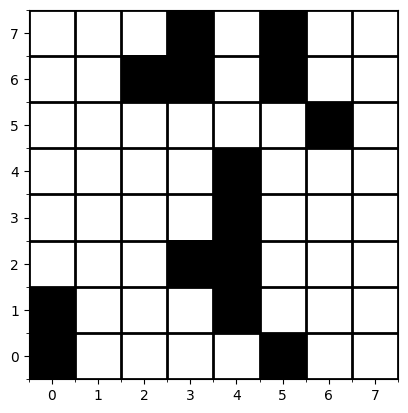

In [50]:
grid = main1() # Make the Grid/Chess Board

Enter pos of Knight: 1 2
Enter pos of King..: 7 0


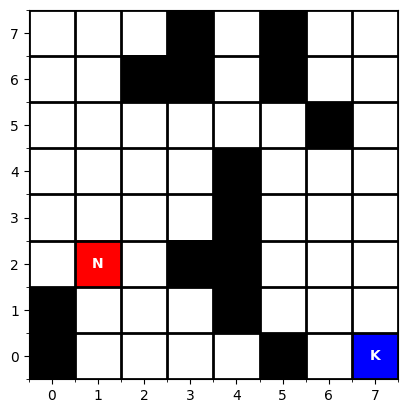

Enter Training Threshold: 1000

TRAINING COMPLETE

---GAMEPLAY---
0


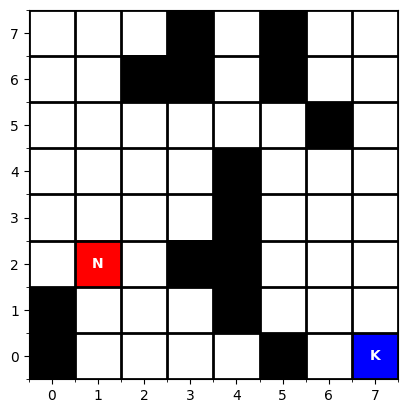

Press Enter to play: 
1


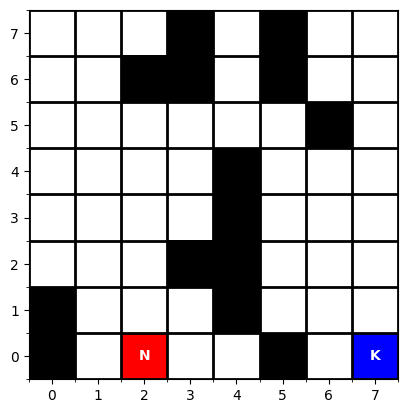

Press Enter to play: 
2


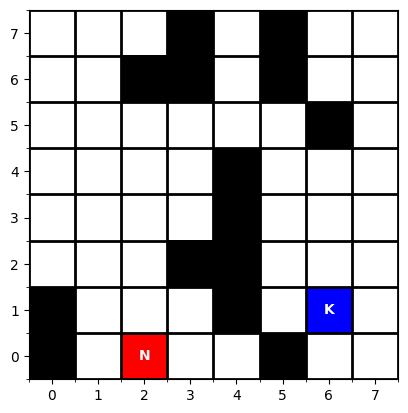

Press Enter to play: 
3


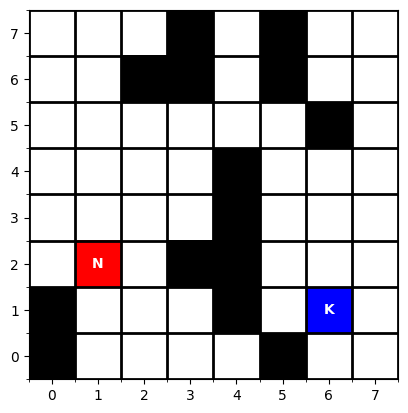

Press Enter to play: 
4


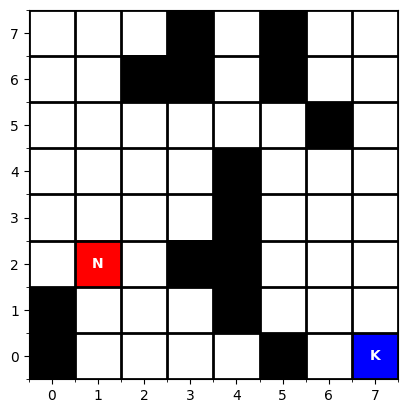

Press Enter to play: 
5


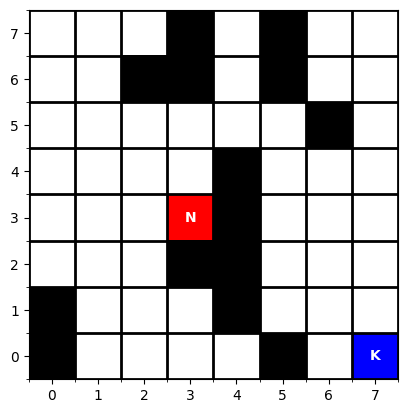

Press Enter to play: 
6


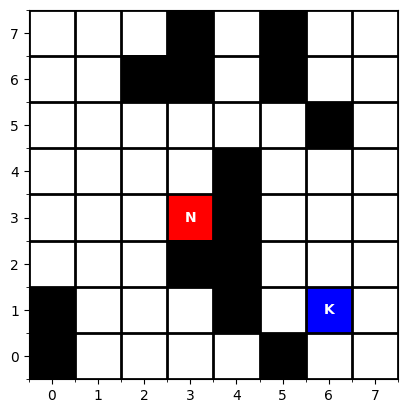

Press Enter to play: 
7


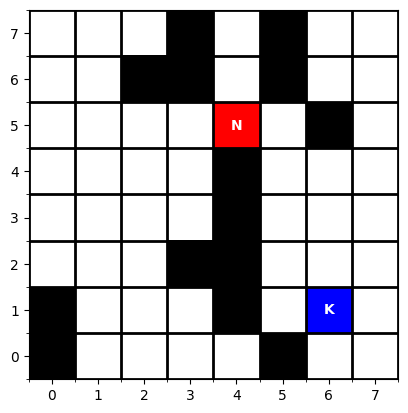

Press Enter to play: 
8


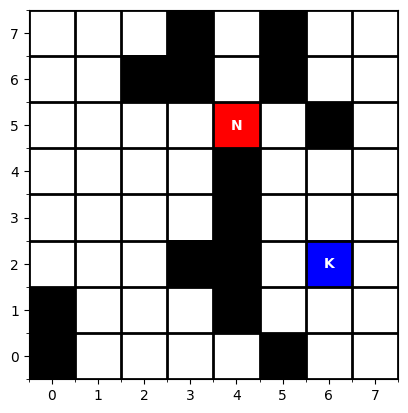

Press Enter to play: 
9


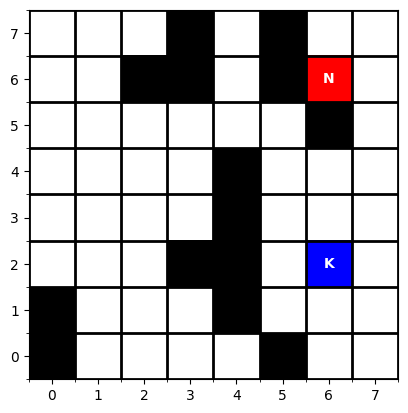

Press Enter to play: 
10


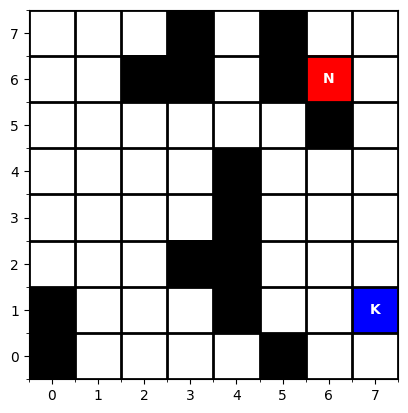

Press Enter to play: 
11


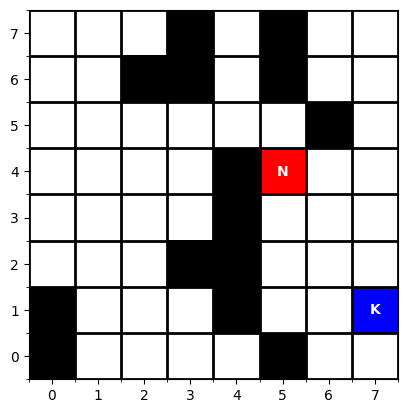

Press Enter to play: 
12


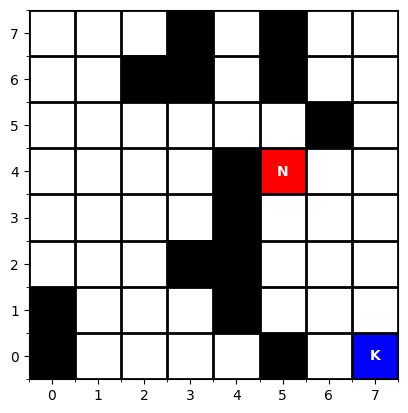

Press Enter to play: 
13


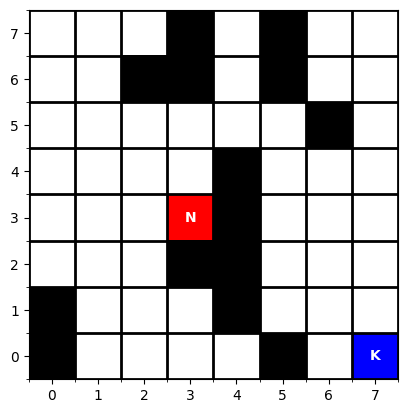

Press Enter to play: 
14


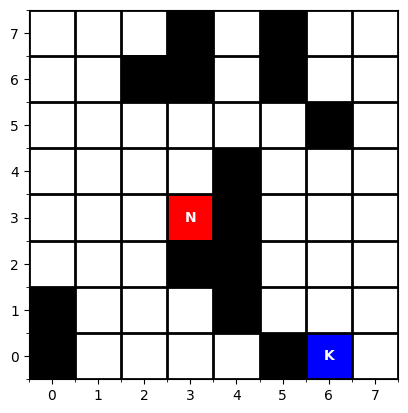

Press Enter to play: 
15


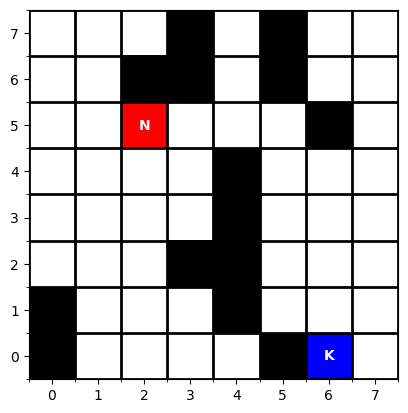

Press Enter to play: 
16


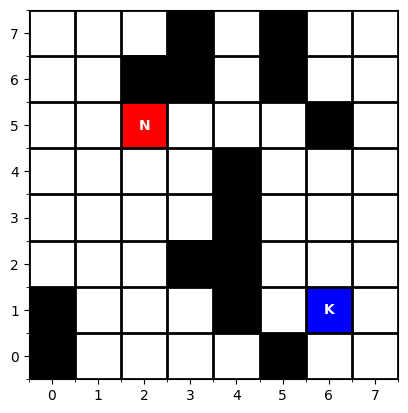

Press Enter to play: 
17


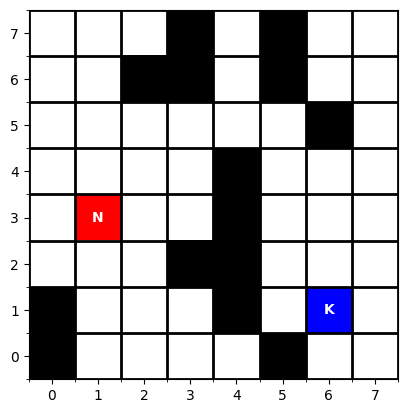

Press Enter to play: 
18


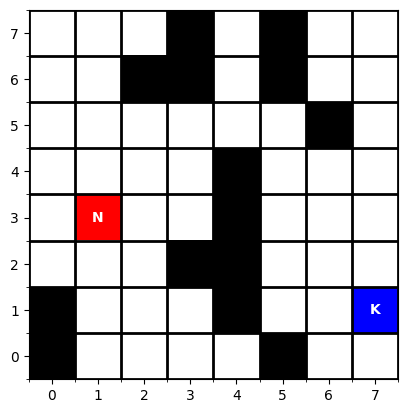

Press Enter to play: 
19


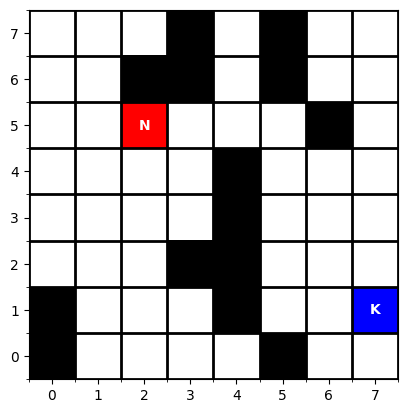

Press Enter to play: 
20


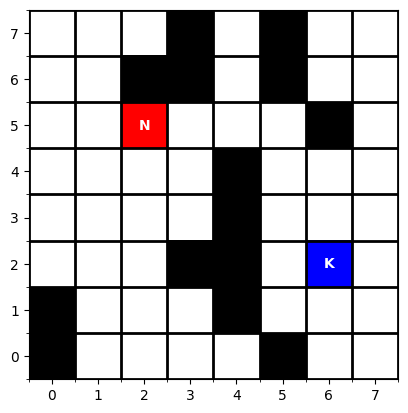

Press Enter to play: 
21


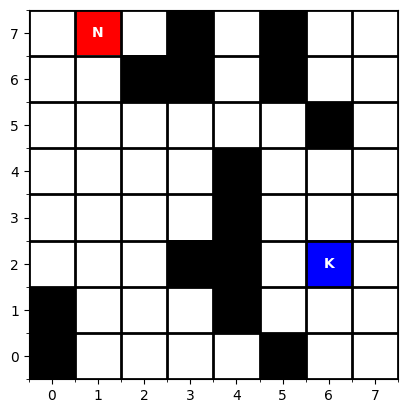

Press Enter to play: 
22


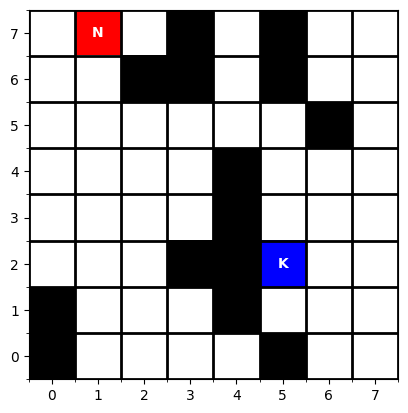

Press Enter to play: 
23


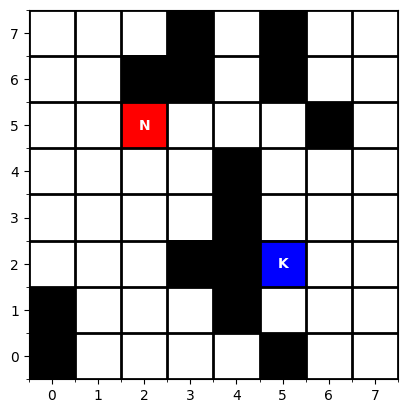

Press Enter to play: 
24


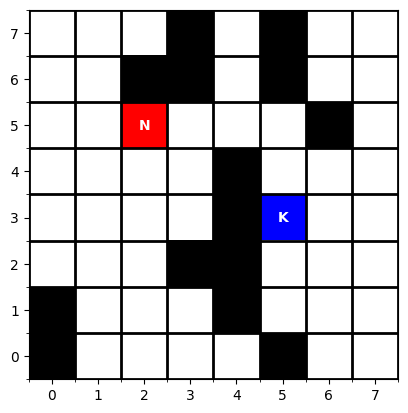

Press Enter to play: 
25


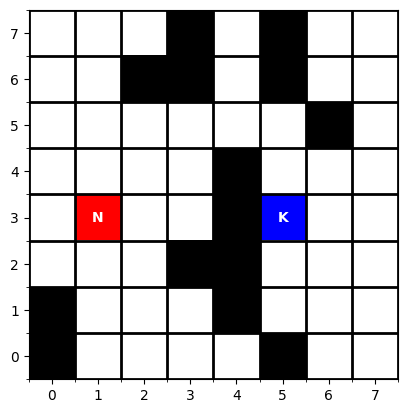

Press Enter to play: 
26


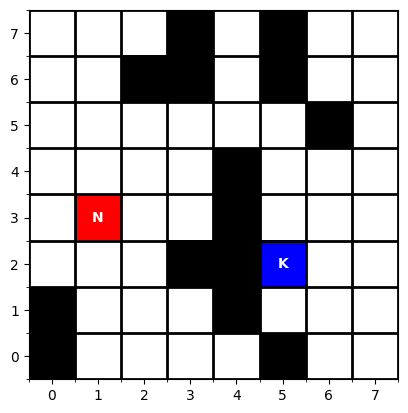

Press Enter to play: 
27


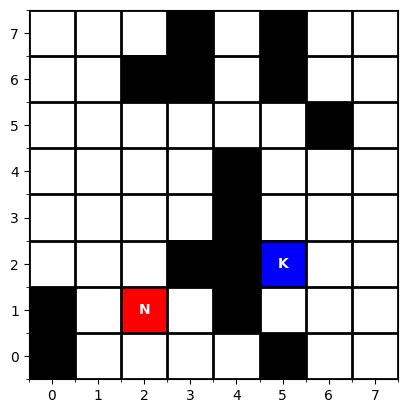

Press Enter to play: 
28


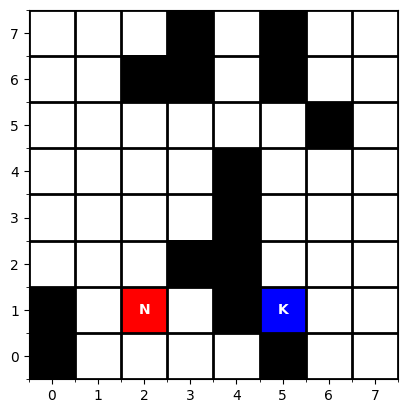

Press Enter to play: 
29


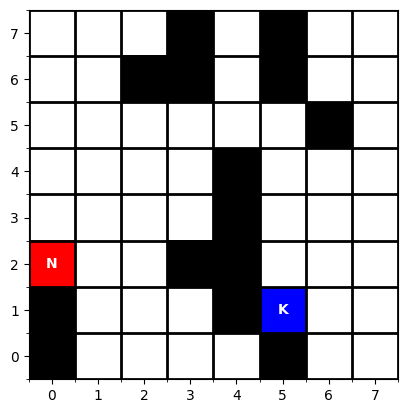

Press Enter to play: 
30


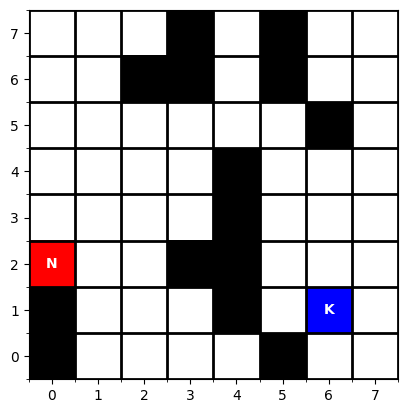

Press Enter to play: 
31


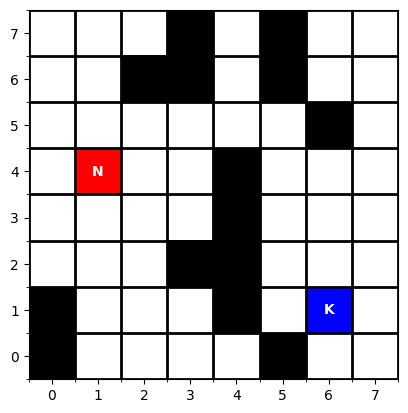

Press Enter to play: 
32


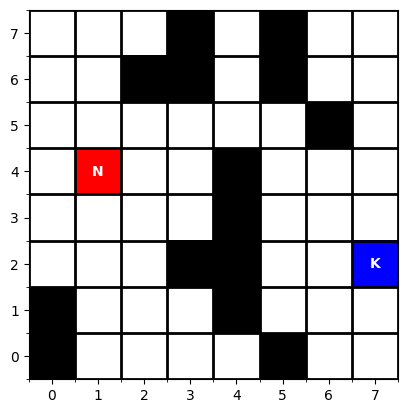

Press Enter to play: 
33


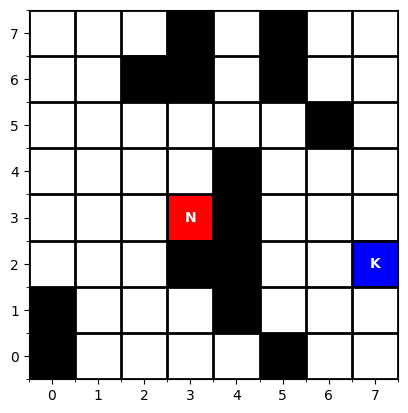

Press Enter to play: 
34


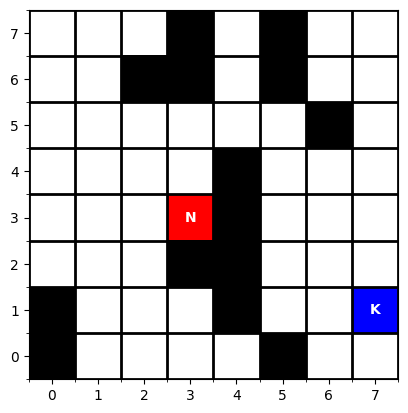

Press Enter to play: 
35


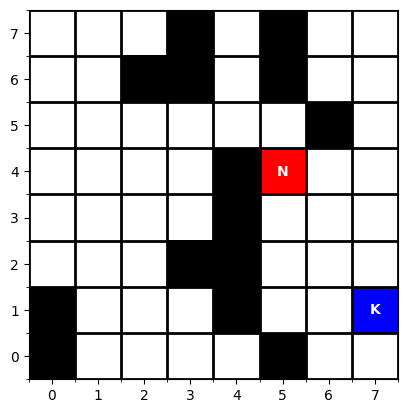

Press Enter to play: 
36


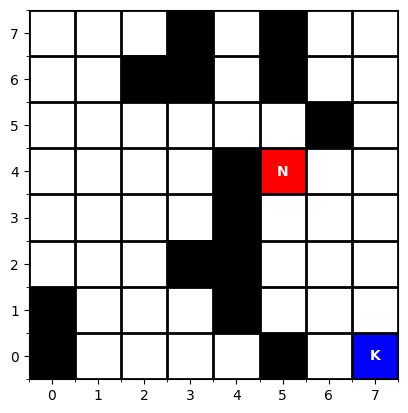

Press Enter to play: 
37


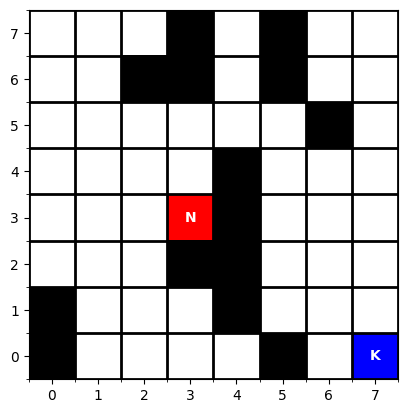

Press Enter to play: 
38


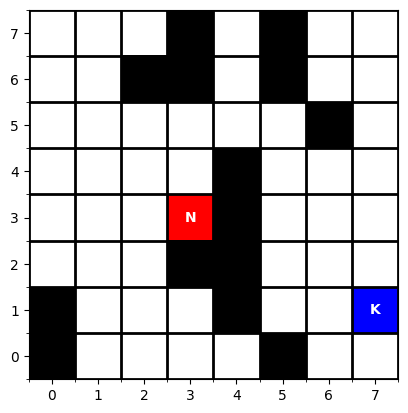

Press Enter to play: 
39


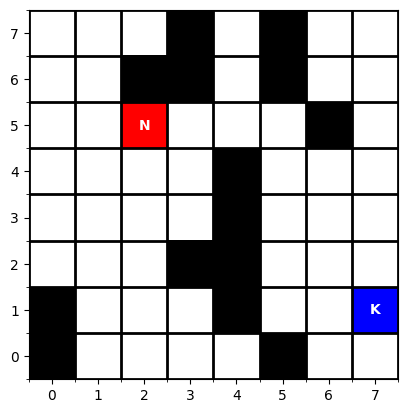

Press Enter to play: 
40


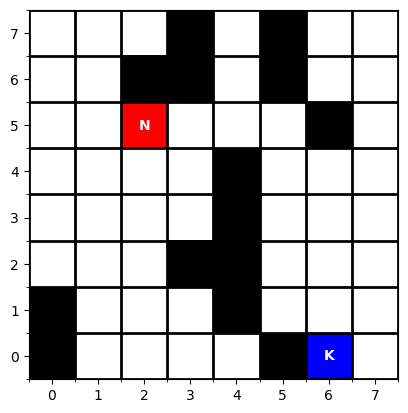

Press Enter to play: 
41


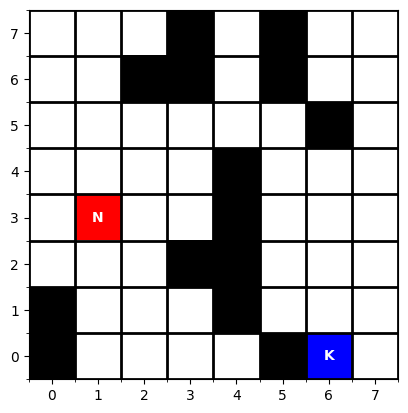

Press Enter to play: 
42


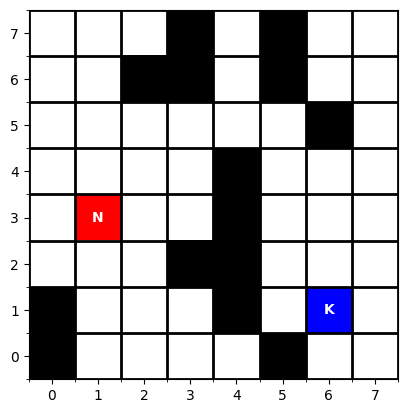

Press Enter to play: 
43


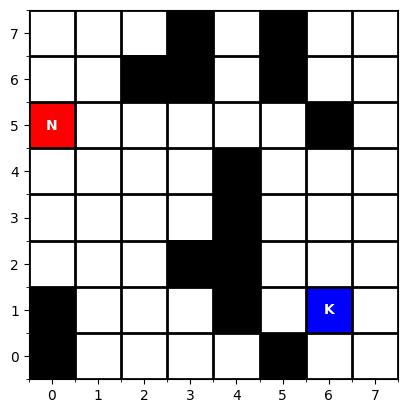

Press Enter to play: 
44


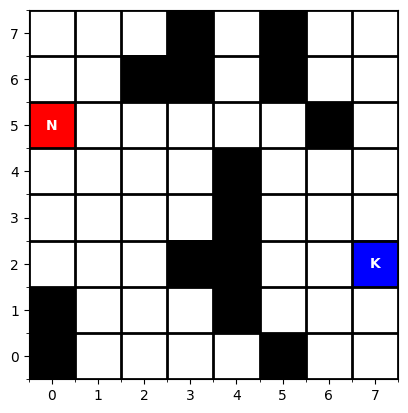

Press Enter to play: 
45


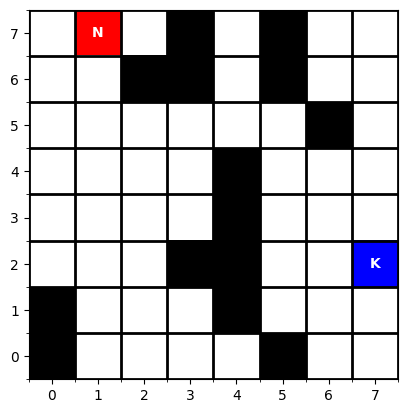

Press Enter to play: 
46


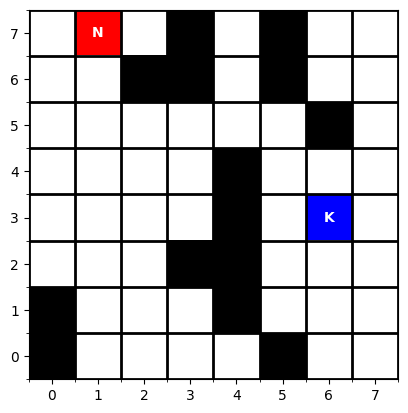

Press Enter to play: 
47


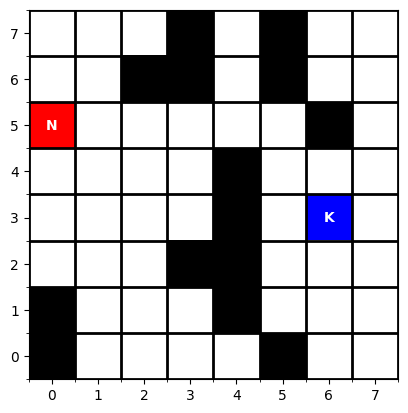

Press Enter to play: 
48


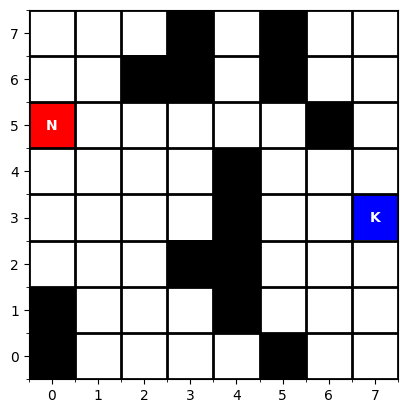

Press Enter to play: 
49


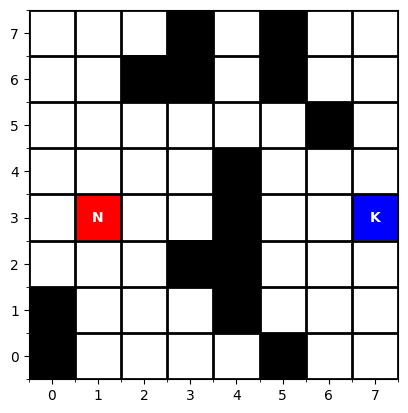

Press Enter to play: 


In [52]:
main2(grid) # Train the bots and play!